# McKinney Chapter 8 - Practice for Section 02

## Announcements

1. *Joining Data with pandas*, our fourth and final DataCamp course, is due by Friday, 2/16, at 11:59 PM
2. We will use class next week, from 2/19 through 2/23, for group work on Project 1, so there is no lecture video or pre-class quiz
3. Project 1 is due by Tuesday, 2/27, at 8:25 AM
3. Please complete the [anonymous ungraded survey on Canvas](https://northeastern.instructure.com/courses/171271/quizzes/586970) to help me help you learn better: 

## 10-Minute Recap

Chapter 8 of McKinney covers 3 topics.

1. *Hierarchical Indexing:* Hierarchical indexing helps us organize data at multiple levels, rather than just a flat, two-dimensional structure.
It helps is work with high-dimensional data in a low-dimensional form.
For example, we can index rows by multiple levels like "ticker" and "date", or columns by "variable" and "ticker".
2. *Combining Data:* We can combine datasets on one or more keys.
    1. We will use the `pd.merge()` function for database-style joins, which can be `inner`, `outer`, `left`, or `right` joins.
    2. We will use the `.join()` method to combine data frames with similar indexes.
    3. We will use the `pd.concat()` to combine similarly-shaped series and data frames.
4. *Reshaping Data:* We can reshape data to change its structure, such as pivoting from wide to long format or vice versa.
We will most often use the `.stack()` and `.unstack()` methods, which pivot columns to rows and rows to columns, respectively.
Laster in the course we will learn about the `.pivot()` method for aggregating data and the `.melt()` method for more advanced reshaping.

## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

### Download data from Yahoo! Finance for BAC, C, GS, JPM, MS, and PNC and assign to data frame `stocks`.

Use `.rename_axis(columns=stocks.columns.names = ['Variable', 'Ticker'])` to assign the names `Variable` and `Ticker` to the column multi index.
We could instead use `stocks.columns.names = ['Variable', 'Ticker']`, but we can chain the `.rename_axis()` method.

In [3]:
stocks = (
    yf.download(tickers='BAC C GS JPM MS PNC')
    .rename_axis(columns=['Variable', 'Ticker'])
)

[*********************100%%**********************]  6 of 6 completed


In [4]:
stocks.tail()

Variable   Adj Close                                              Close  \
Ticker           BAC       C       GS      JPM      MS      PNC     BAC   
Date                                                                      
2024-02-12   33.6200 53.9200 392.6400 175.7900 86.8700 149.1400 33.6200   
2024-02-13   32.7500 52.7600 378.7500 174.2600 83.9700 145.2600 32.7500   
2024-02-14   33.1300 53.9800 378.0400 176.0300 84.0000 147.8700 33.1300   
2024-02-15   34.0700 55.2100 385.4200 179.8700 85.6700 149.6300 34.0700   
2024-02-16   34.0900 54.8500 384.4400 179.0300 86.5000 148.8500 34.0900   

Variable                              ...     Open                            \
Ticker           C       GS      JPM  ...       GS      JPM      MS      PNC   
Date                                  ...                                      
2024-02-12 53.9200 392.6400 175.7900  ... 385.0000 174.7800 85.8600 147.7700   
2024-02-13 52.7600 378.7500 174.2600  ... 387.5900 175.3200 85.8600 146.7800   
2024-02-14 53.9800 378.0400 176.0300  ... 380.8800 175.0700 84.5400 146.6300   
2024-02-15 55.2100 385.4200 179.8700  ... 379.4200 176.1500 84.4500 148.7500   
2024-02-16 54.8500 384.4400 179.0300  ... 383.2400 179.6100 85.5200 148.4200   

Variable      Volume                                                        \
Ticker           BAC             C           GS          JPM            MS   
Date                                                                         
2024-02-12  34160400 17162300.0000 2797200.0000 8539300.0000  7888000.0000   
2024-02-13  43801500 17672100.0000 3030800.0000 8397600.0000 11339400.0000   
2024-02-14  27833900 14891900.0000 2041300.0000 7056700.0000  5973700.0000   
2024-02-15  41683100 16865000.0000 2218900.0000 8723400.0000  7993500.0000   
2024-02-16  33146357 11419637.0000 2302099.0000 6234328.0000  8369968.0000   

Variable                 
Ticker              PNC  
Date                     
2024-02-12 1612700.0000  
2024-02-13 2121400.0000  
2024-02-14 1265300.0000  
2024-02-15 1991800.0000  
2024-02-16 1465354.0000  

[5 rows x 36 columns]

### Reshape `stocks` from wide to long with dates and tickers as row indexes and assign to data frame `stocks_long`.

 By default, `.stack()` stacks the inner column index to the inner row index.

In [5]:
stocks_long = stocks.stack()

In [6]:
stocks_long.tail()

Variable           Adj Close    Close     High      Low     Open        Volume
Date       Ticker                                                             
2024-02-16 C         54.8500  54.8500  55.1950  54.5500  54.9600 11419637.0000
           GS       384.4400 384.4400 387.5800 380.9450 383.2400  2302099.0000
           JPM      179.0300 179.0300 179.9800 178.1602 179.6100  6234328.0000
           MS        86.5000  86.5000  86.7900  85.0800  85.5200  8369968.0000
           PNC      148.8500 148.8500 149.9100 147.7700 148.4200  1465354.0000

### Add daily returns for each stock to data frames `stocks` and `stocks_long`.

Name the returns variable `Returns`, and maintain all multi indexes.
*Hint:* Use `pd.MultiIndex()` to create a multi index for the the wide data frame `stocks`.

In [7]:
stocks['Adj Close'].columns

Index(['BAC', 'C', 'GS', 'JPM', 'MS', 'PNC'], dtype='object', name='Ticker')

In [8]:
_ = pd.MultiIndex.from_product([['Returns'], stocks['Adj Close'].columns]) # I use _ as a temporary variable
stocks[_] = stocks['Adj Close'].iloc[:-1].pct_change()

In [9]:
stocks.tail()

Variable   Adj Close                                              Close  \
Ticker           BAC       C       GS      JPM      MS      PNC     BAC   
Date                                                                      
2024-02-12   33.6200 53.9200 392.6400 175.7900 86.8700 149.1400 33.6200   
2024-02-13   32.7500 52.7600 378.7500 174.2600 83.9700 145.2600 32.7500   
2024-02-14   33.1300 53.9800 378.0400 176.0300 84.0000 147.8700 33.1300   
2024-02-15   34.0700 55.2100 385.4200 179.8700 85.6700 149.6300 34.0700   
2024-02-16   34.0900 54.8500 384.4400 179.0300 86.5000 148.8500 34.0900   

Variable                              ...       Volume               \
Ticker           C       GS      JPM  ...           GS          JPM   
Date                                  ...                             
2024-02-12 53.9200 392.6400 175.7900  ... 2797200.0000 8539300.0000   
2024-02-13 52.7600 378.7500 174.2600  ... 3030800.0000 8397600.0000   
2024-02-14 53.9800 378.0400 176.0300  ... 2041300.0000 7056700.0000   
2024-02-15 55.2100 385.4200 179.8700  ... 2218900.0000 8723400.0000   
2024-02-16 54.8500 384.4400 179.0300  ... 2302099.0000 6234328.0000   

Variable                              Returns                                  \
Ticker                MS          PNC     BAC       C      GS     JPM      MS   
Date                                                                            
2024-02-12  7888000.0000 1612700.0000  0.0166 -0.0013  0.0218  0.0045  0.0114   
2024-02-13 11339400.0000 2121400.0000 -0.0259 -0.0215 -0.0354 -0.0087 -0.0334   
2024-02-14  5973700.0000 1265300.0000  0.0116  0.0231 -0.0019  0.0102  0.0004   
2024-02-15  7993500.0000 1991800.0000  0.0284  0.0228  0.0195  0.0218  0.0199   
2024-02-16  8369968.0000 1465354.0000     NaN     NaN     NaN     NaN     NaN   

Variable            
Ticker         PNC  
Date                
2024-02-12  0.0093  
2024-02-13 -0.0260  
2024-02-14  0.0180  
2024-02-15  0.0119  
2024-02-16     NaN  

[5 rows x 42 columns]

The easiest way to add returns to long data frame `stocks_long` is to `.stack()` the wide data frame `stocks`!
We could sort `stocks_long` by ticker and date (to sort chronologically within each ticker), then use `.pct_change()`.
However, this approach miscalculates the first return for every ticker except for the first ticker.
The easiest and safest solution is to `.stack()` the wide data frame `stocks`!

In [10]:
stocks_long = stocks.stack()

In [11]:
stocks_long.tail()

Variable           Adj Close    Close     High      Low     Open  \
Date       Ticker                                                  
2024-02-16 C         54.8500  54.8500  55.1950  54.5500  54.9600   
           GS       384.4400 384.4400 387.5800 380.9450 383.2400   
           JPM      179.0300 179.0300 179.9800 178.1602 179.6100   
           MS        86.5000  86.5000  86.7900  85.0800  85.5200   
           PNC      148.8500 148.8500 149.9100 147.7700 148.4200   

Variable                 Volume  Returns  
Date       Ticker                         
2024-02-16 C      11419637.0000      NaN  
           GS      2302099.0000      NaN  
           JPM     6234328.0000      NaN  
           MS      8369968.0000      NaN  
           PNC     1465354.0000      NaN

### Download the daily benchmark return factors from Ken French's data library.

I rarely remember the exact combination of uppercase and lowercase letters, dashes, and underscores, so I use `pdr.famafrench.get_available_datasets()` to display the list of available names for data from Ken French's website.

In [12]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [13]:
ff = (
    pdr.DataReader(
        name='F-F_Research_Data_Factors_daily',
        data_source='famafrench',
        start='1900' # otherwise, pdr.DataReader defaults to the last five years of data
    )
    [0] # pdr.DataReader returns a dictionary of data frames
    .div(100) # French stores returns as percents, but our stock returns are decimals
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_11480\1909726130.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  pdr.DataReader(


In [14]:
ff.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2023-12-22,0.0021,0.0064,0.0009,0.0002
2023-12-26,0.0048,0.0069,0.0046,0.0002
2023-12-27,0.0016,0.0014,0.0012,0.0002
2023-12-28,-0.0001,-0.0036,0.0003,0.0002
2023-12-29,-0.0043,-0.0112,-0.0037,0.0002


### Add the daily benchmark return factors to `stocks` and `stocks_long`.

For the wide data frame `stocks`, use the outer index name `Factors`.

In [15]:
# stocks.join(ff)
# MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

In [16]:
_ = pd.MultiIndex.from_product([['Factors'], ff.columns]) # I use _ as a temporary variable
stocks[_] = ff

In [17]:
stocks.tail()

Variable   Adj Close                                              Close  \
Ticker           BAC       C       GS      JPM      MS      PNC     BAC   
Date                                                                      
2024-02-12   33.6200 53.9200 392.6400 175.7900 86.8700 149.1400 33.6200   
2024-02-13   32.7500 52.7600 378.7500 174.2600 83.9700 145.2600 32.7500   
2024-02-14   33.1300 53.9800 378.0400 176.0300 84.0000 147.8700 33.1300   
2024-02-15   34.0700 55.2100 385.4200 179.8700 85.6700 149.6300 34.0700   
2024-02-16   34.0900 54.8500 384.4400 179.0300 86.5000 148.8500 34.0900   

Variable                              ... Returns                          \
Ticker           C       GS      JPM  ...     BAC       C      GS     JPM   
Date                                  ...                                   
2024-02-12 53.9200 392.6400 175.7900  ...  0.0166 -0.0013  0.0218  0.0045   
2024-02-13 52.7600 378.7500 174.2600  ... -0.0259 -0.0215 -0.0354 -0.0087   
2024-02-14 53.9800 378.0400 176.0300  ...  0.0116  0.0231 -0.0019  0.0102   
2024-02-15 55.2100 385.4200 179.8700  ...  0.0284  0.0228  0.0195  0.0218   
2024-02-16 54.8500 384.4400 179.0300  ...     NaN     NaN     NaN     NaN   

Variable                   Factors              
Ticker          MS     PNC  Mkt-RF SMB HML  RF  
Date                                            
2024-02-12  0.0114  0.0093     NaN NaN NaN NaN  
2024-02-13 -0.0334 -0.0260     NaN NaN NaN NaN  
2024-02-14  0.0004  0.0180     NaN NaN NaN NaN  
2024-02-15  0.0199  0.0119     NaN NaN NaN NaN  
2024-02-16     NaN     NaN     NaN NaN NaN NaN  

[5 rows x 46 columns]

In [18]:
stocks_long = stocks_long.join(ff)

In [19]:
stocks_long.head()

,,Adj Close,Close,High,Low,Open,Volume,Returns,Mkt-RF,SMB,HML,RF
Date,Ticker,,,,,,,,,,,
1973-02-21,BAC,1.5818,4.6250,4.6250,4.6250,4.6250,99200.0000,NaN,-0.0074,-0.0039,0.0054,0.0002
1973-02-22,BAC,1.5872,4.6406,4.6406,4.6406,4.6406,47200.0000,0.0034,-0.0030,-0.0037,0.0022,0.0002
1973-02-23,BAC,1.5818,4.6250,4.6250,4.6250,4.6250,133600.0000,-0.0034,-0.0108,-0.0019,0.0054,0.0002
1973-02-26,BAC,1.5818,4.6250,4.6250,4.6250,4.6250,24000.0000,0.0000,-0.0088,-0.0050,0.0054,0.0002
1973-02-27,BAC,1.5818,4.6250,4.6250,4.6250,4.6250,41600.0000,0.0000,-0.0115,-0.0018,0.0064,0.0002


We can check that `.join()` used the same factor returns on the same days.

In [20]:
stocks_long.loc['2023-12'].tail(12)

Adj Close    Close     High      Low     Open  \
Date       Ticker                                                  
2023-12-28 BAC       33.8800  33.8800  33.9700  33.7700  33.8200   
           C         51.0329  51.5200  51.8000  51.4000  51.4000   
           GS       386.4100 386.4100 387.7600 383.6300 384.5200   
           JPM      169.2563 170.3000 170.6600 169.0000 169.3500   
           MS        92.7316  93.6400  93.9500  93.2400  93.3100   
           PNC      154.0486 155.6300 156.2100 154.9500 155.4400   
2023-12-29 BAC       33.6700  33.6700  33.9900  33.5500  33.9400   
           C         50.9537  51.4400  51.6100  51.2200  51.5600   
           GS       385.7700 385.7700 386.6400 383.5700 385.5700   
           JPM      169.0575 170.1000 170.6900 169.6300 170.0000   
           MS        92.3454  93.2500  93.7700  93.0600  93.4900   
           PNC      153.2765 154.8500 156.1100 154.5200 155.2700   

                         Volume  Returns  Mkt-RF     SMB     HML     RF  
Date       Ticker                                                        
2023-12-28 BAC    21799600.0000   0.0012 -0.0001 -0.0036  0.0003 0.0002  
           C      10218500.0000   0.0012 -0.0001 -0.0036  0.0003 0.0002  
           GS      1024700.0000   0.0050 -0.0001 -0.0036  0.0003 0.0002  
           JPM     6320100.0000   0.0053 -0.0001 -0.0036  0.0003 0.0002  
           MS      4089500.0000  -0.0002 -0.0001 -0.0036  0.0003 0.0002  
           PNC     1153300.0000   0.0041 -0.0001 -0.0036  0.0003 0.0002  
2023-12-29 BAC    28037800.0000  -0.0062 -0.0043 -0.0112 -0.0037 0.0002  
           C      13147900.0000  -0.0016 -0.0043 -0.0112 -0.0037 0.0002  
           GS       881300.0000  -0.0017 -0.0043 -0.0112 -0.0037 0.0002  
           JPM     6431800.0000  -0.0012 -0.0043 -0.0112 -0.0037 0.0002  
           MS      4772100.0000  -0.0042 -0.0043 -0.0112 -0.0037 0.0002  
           PNC     1572600.0000  -0.0050 -0.0043 -0.0112 -0.0037 0.0002

### Write a function `download()` that accepts tickers and returns a wide data frame of returns with the daily benchmark return factors.

We can even add a `shape` argument to return a wide or long data frame!

In [21]:
def download(tickers, shape='wide'):
    if shape.lower() not in ['wide', 'long']:
        raise ValueError('Invalid shape: must be "wide" or "long".')

    stocks = yf.download(tickers)

    factors_all = (
        pdr.DataReader(
            name='F-F_Research_Data_Factors_daily',
            data_source='famafrench',
            start='1900'
        )
    )
    
    factors = factors_all[0].div(100)
    
    # if stocks has a multi index on the columns because we asked for more than one ticker
    # then we have more work to do
    if type(stocks.columns) is pd.MultiIndex:
        
        # whether we want a wide or long data frame, it is easier to add returns to a wide data frame
        _ = pd.MultiIndex.from_product([['Returns'], stocks['Adj Close'].columns])
        stocks[_] = stocks['Adj Close'].pct_change()

        # if we want a wide data frame, then we need a factors multi index
        if shape.lower() == 'wide':
            _ = pd.MultiIndex.from_product([['Factors'], factors.columns])
            stocks[_] = factors
            return stocks.rename_axis(columns=['Variable', 'Ticker'])

        # if we want a long data frame, then we need to stack stocks and join factors
        # because we tested for wide and long above, we know that here shape must be long
        else:
            return stocks.stack().join(factors).rename_axis(columns=['Variable'], index=['Date', 'Ticker'])
            
    # if stocks does not have a multi index on the columns
    # then we only have join factors
    else:
        return stocks.join(ff).rename_axis(columns=['Variable'])

In [22]:
download(tickers=['AAPL', 'TSLA'], shape='long')

[*********************100%%**********************]  2 of 2 completed
C:\Users\r.herron\AppData\Local\Temp\ipykernel_11480\3667605341.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  pdr.DataReader(


Variable           Adj Close    Close     High      Low     Open  \
Date       Ticker                                                  
1980-12-12 AAPL       0.0992   0.1283   0.1289   0.1283   0.1283   
1980-12-15 AAPL       0.0940   0.1217   0.1222   0.1217   0.1222   
1980-12-16 AAPL       0.0871   0.1127   0.1133   0.1127   0.1133   
1980-12-17 AAPL       0.0893   0.1155   0.1161   0.1155   0.1155   
1980-12-18 AAPL       0.0919   0.1189   0.1194   0.1189   0.1189   
...                      ...      ...      ...      ...      ...   
2024-02-14 TSLA     188.7100 188.7100 188.8900 183.3500 185.3000   
2024-02-15 AAPL     183.8600 183.8600 184.4900 181.3500 183.5500   
           TSLA     200.4500 200.4500 200.8800 188.8600 189.1600   
2024-02-16 AAPL     182.3100 182.3100 184.8500 181.6650 183.4200   
           TSLA     199.9500 199.9500 203.1700 197.4000 202.0600   

Variable                  Volume  Returns  Mkt-RF     SMB     HML     RF  
Date       Ticker                                                         
1980-12-12 AAPL   469033600.0000      NaN  0.0138 -0.0001 -0.0105 0.0006  
1980-12-15 AAPL   175884800.0000  -0.0522  0.0011  0.0025 -0.0046 0.0006  
1980-12-16 AAPL   105728000.0000  -0.0734  0.0071 -0.0075 -0.0047 0.0006  
1980-12-17 AAPL    86441600.0000   0.0248  0.0152 -0.0086 -0.0034 0.0006  
1980-12-18 AAPL    73449600.0000   0.0290  0.0041  0.0022  0.0126 0.0006  
...                          ...      ...     ...     ...     ...    ...  
2024-02-14 TSLA    81203000.0000   0.0255     NaN     NaN     NaN    NaN  
2024-02-15 AAPL    65434500.0000  -0.0016     NaN     NaN     NaN    NaN  
           TSLA   120831800.0000   0.0622     NaN     NaN     NaN    NaN  
2024-02-16 AAPL    48627624.0000  -0.0084     NaN     NaN     NaN    NaN  
           TSLA   110528448.0000  -0.0025     NaN     NaN     NaN    NaN  

[14319 rows x 11 columns]

### Download earnings per share for the stocks in `stocks` and combine to a long data frame `earnings`.

Use the `.earnings_dates` method described [here](https://pypi.org/project/yfinance/).
Use `pd.concat()` to combine the result of each the `.earnings_date` data frames and assign them to a new data frame `earnings`.
Name the row indexes `Ticker` and `Date` and swap to match the order of the row index in `stocks_long`.

In [23]:
tickers = yf.Tickers(tickers='BAC C GS JPM MS PNC')

In [24]:
earnings  = (
    pd.concat(
        objs=[tickers.tickers[t].earnings_dates for t in tickers.tickers],
        keys=tickers.tickers,
        names=['Ticker', 'Date']
    )
    .reset_index()
)

In [25]:
earnings.tail()

,Ticker,Date,EPS Estimate,Reported EPS,Surprise(%)
67,PNC,2024-04-16 08:00:00-04:00,3.0800,NaN,NaN
68,PNC,2024-01-16 06:00:00-05:00,2.9400,3.1600,0.0737
69,PNC,2023-10-13 06:00:00-04:00,3.1100,3.6000,0.1586
70,PNC,2023-07-18 07:00:00-04:00,3.2800,3.3600,0.0230
71,PNC,2023-04-14 06:00:00-04:00,3.6700,3.9800,0.0847


### Combine `earnings` with the returns from `stocks_long`.

Use the `tz_localize('America/New_York')` method add time zone information back to `returns.index` and use `pd.to_timedelta(16, unit='h')` to set time to the market close in New York City.
Use [`pd.merge_asof()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge_asof.html) to match earnings announcement dates and times to appropriate return periods.
For example, if a firm announces earnings after the close at 5 PM on February 7, we want to match the return period from 4 PM on February 7 to 4 PM on February 8.

In [26]:
returns = (
    stocks_long
    .reset_index()
    [['Date', 'Ticker', 'Returns']]
    .assign(
        Date=lambda x: x['Date'].dt.tz_localize('America/New_York') + pd.to_timedelta(16, unit='H')
    )
)

In [27]:
returns.tail()

,Date,Ticker,Returns
62021,2024-02-16 16:00:00-05:00,C,NaN
62022,2024-02-16 16:00:00-05:00,GS,NaN
62023,2024-02-16 16:00:00-05:00,JPM,NaN
62024,2024-02-16 16:00:00-05:00,MS,NaN
62025,2024-02-16 16:00:00-05:00,PNC,NaN


In [28]:
surprises = pd.merge_asof(
    left=earnings.sort_values(['Date', 'Ticker']),
    right=returns.sort_values(['Date', 'Ticker']),
    on='Date',
    by='Ticker',
    direction='forward'
)

In [29]:
surprises.tail()

,Ticker,Date,EPS Estimate,Reported EPS,Surprise(%),Returns
67,JPM,2025-01-15 08:00:00-05:00,NaN,NaN,NaN,NaN
68,JPM,2025-01-15 08:00:00-05:00,NaN,NaN,NaN,NaN
69,C,2025-01-15 11:00:00-05:00,NaN,NaN,NaN,NaN
70,PNC,2025-01-16 08:00:00-05:00,NaN,NaN,NaN,NaN
71,PNC,2025-01-16 10:00:00-05:00,NaN,NaN,NaN,NaN


### Plot the relation between daily returns and earnings surprises

Three options in increasing difficulty:

1. Scatter plot
1. Scatter plot with a best-fit line using `regplot()` from the seaborn package
1. Bar plot using `barplot()` from the seaborn package after using `pd.qcut()` to form five groups on earnings surprises

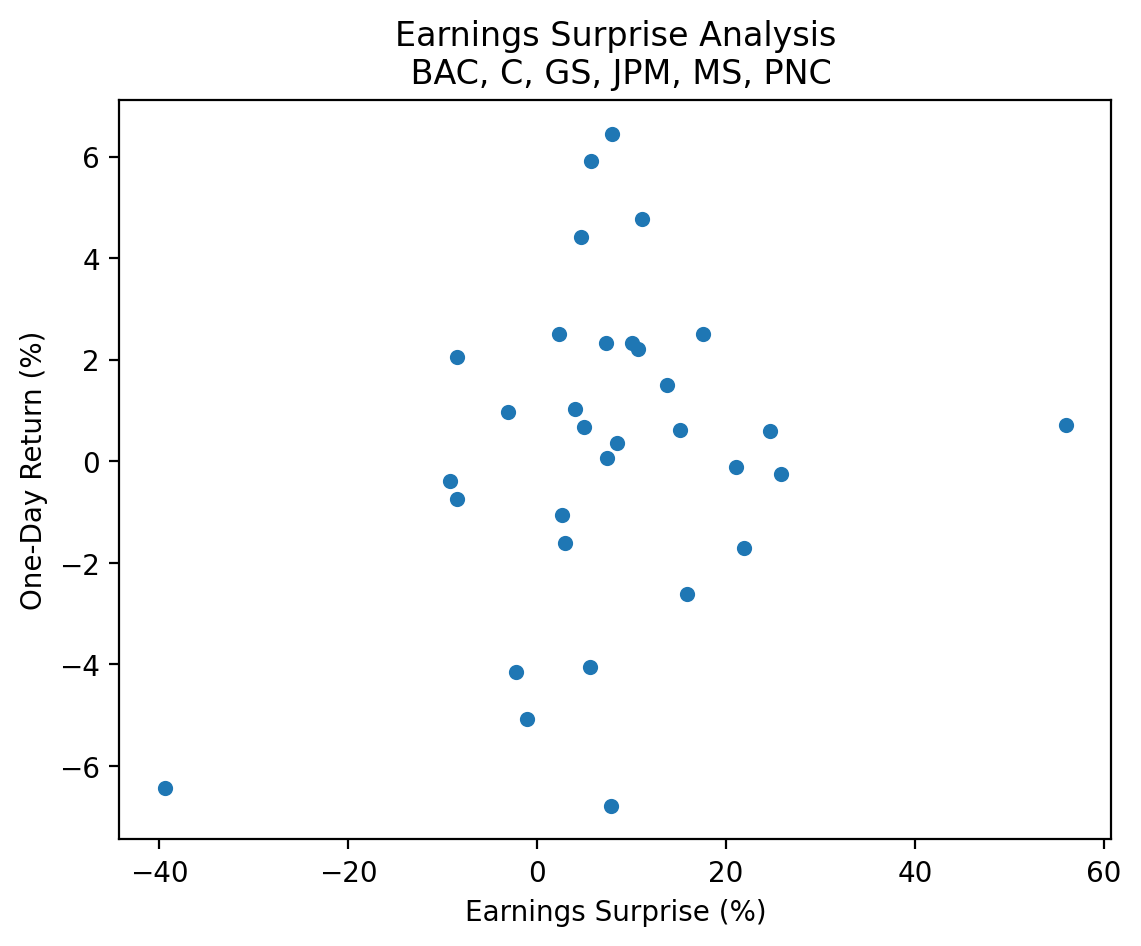

In [30]:
(
    surprises
    [['Surprise(%)', 'Returns']]
    .mul(100)
    .plot(kind='scatter', x='Surprise(%)', y='Returns')
)

plt.xlabel('Earnings Surprise (%)')
plt.ylabel('One-Day Return (%)')
plt.title(f'Earnings Surprise Analysis\n {', '.join(tickers.tickers)}')
plt.show()

In [31]:
import seaborn as sns

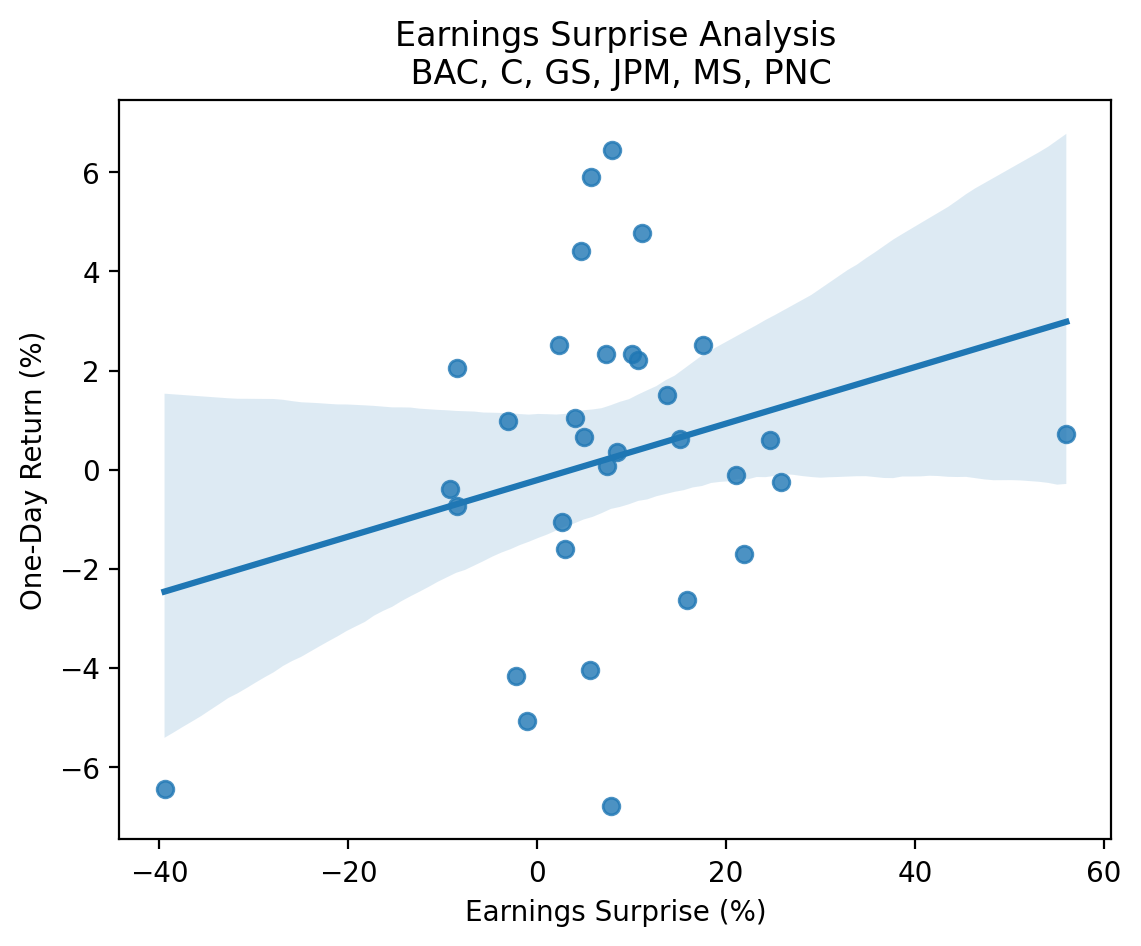

In [32]:
sns.regplot(
    data=surprises[['Surprise(%)', 'Returns']].mul(100),
    x='Surprise(%)',
    y='Returns'
)

plt.xlabel('Earnings Surprise (%)')
plt.ylabel('One-Day Return (%)')
plt.title(f'Earnings Surprise Analysis\n {', '.join(tickers.tickers)}')
plt.show()

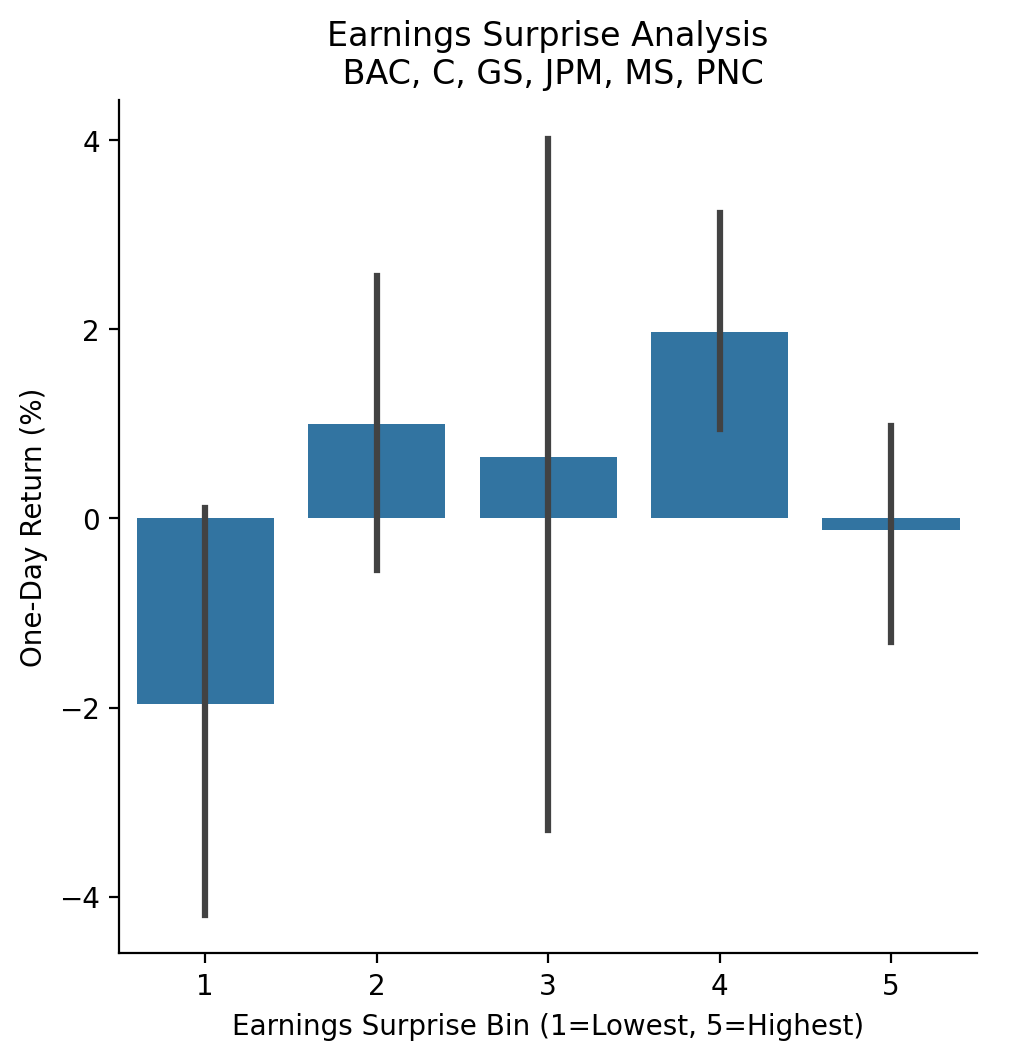

In [33]:
sns.catplot(
    data=(
        surprises[['Surprise(%)', 'Returns']]
        .dropna()
        .mul(100)
        .assign(
            surprise_bin=lambda x: pd.qcut(x['Surprise(%)'], q=5, labels=False)+1
        )
    ),
    x='surprise_bin',
    y='Returns',
    kind='bar'
)

plt.xlabel('Earnings Surprise Bin (1=Lowest, 5=Highest)')
plt.ylabel('One-Day Return (%)')
plt.title(f'Earnings Surprise Analysis\n {', '.join(tickers.tickers)}')
plt.show()

### Repeat the earnings exercise with the S&P 100 stocks

With more data, we can more clearly see the positive relation between earnings surprises and returns!

In [34]:
_ = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2]['Symbol'].to_list()
tickers_2 = yf.Tickers(tickers=[t.replace('.', '-') for t in _]) # Yahoo! Finance uses "-" to indicate share classes instead of "."

In [35]:
earnings_2  = (
    pd.concat(
        objs=[tickers_2.tickers[t].earnings_dates for t in tickers_2.tickers],
        keys=tickers_2.tickers,
        names=['Ticker', 'Date']
    )
    .reset_index()
)

In [36]:
earnings_2.tail()

,Ticker,Date,EPS Estimate,Reported EPS,Surprise(%)
1207,XOM,2023-04-28 06:00:00-04:00,2.5900,2.8300,0.0943
1208,XOM,2023-01-31 06:00:00-05:00,3.2900,3.4000,0.0319
1209,XOM,2022-10-28 06:00:00-04:00,3.7900,4.4500,0.1733
1210,XOM,2022-07-29 06:00:00-04:00,3.7400,4.1400,0.1077
1211,XOM,2022-04-29 06:00:00-04:00,2.1200,2.0700,-0.0247


In [37]:
returns_2 = (
    yf.download(tickers=[t for t in tickers_2.tickers])
    .rename_axis(columns=['Variable', 'Ticker'])
    ['Adj Close']
    .pct_change()
    .stack()
    .to_frame('Returns')
    .reset_index()
    [['Date', 'Ticker', 'Returns']]
    .assign(
        Date=lambda x: x['Date'].dt.tz_localize('America/New_York') + pd.to_timedelta(16, unit='H')
    )
)

[*********************100%%**********************]  101 of 101 completed


In [38]:
returns_2.tail()

,Date,Ticker,Returns
1018569,2024-02-16 16:00:00-05:00,V,-0.0086
1018570,2024-02-16 16:00:00-05:00,VZ,-0.0025
1018571,2024-02-16 16:00:00-05:00,WFC,-0.0025
1018572,2024-02-16 16:00:00-05:00,WMT,0.0063
1018573,2024-02-16 16:00:00-05:00,XOM,0.0000


In [39]:
surprises_2 = pd.merge_asof(
    left=earnings_2.sort_values(['Date', 'Ticker']),
    right=returns_2.sort_values(['Date', 'Ticker']),
    on='Date',
    by='Ticker',
    direction='forward'
)

In [40]:
surprises_2.tail()

,Ticker,Date,EPS Estimate,Reported EPS,Surprise(%),Returns
1207,USB,2025-10-16 09:00:00-04:00,NaN,NaN,NaN,NaN
1208,USB,2025-10-16 09:00:00-04:00,NaN,NaN,NaN,NaN
1209,RTX,2025-10-20 06:00:00-04:00,NaN,NaN,NaN,NaN
1210,USB,2026-01-20 09:00:00-05:00,NaN,NaN,NaN,NaN
1211,USB,2026-01-20 09:00:00-05:00,NaN,NaN,NaN,NaN


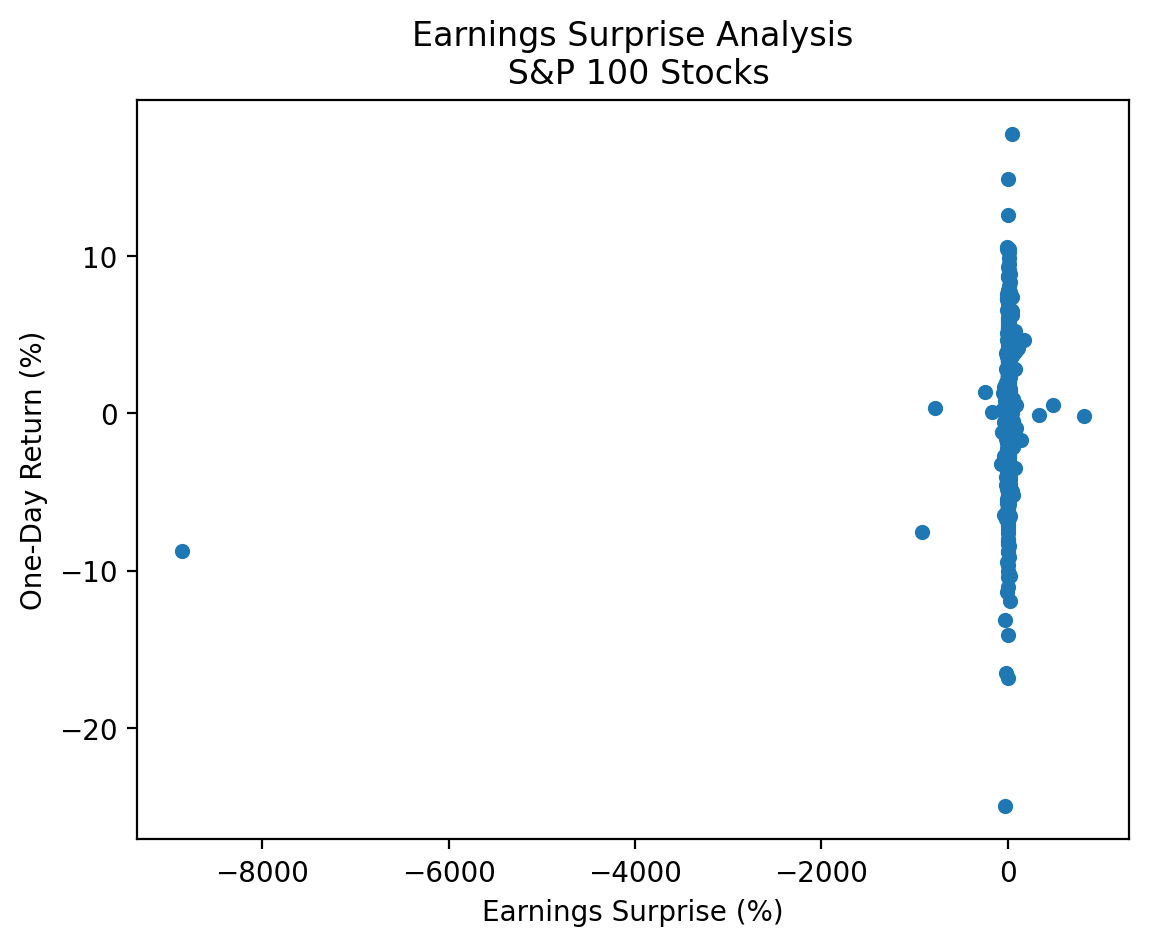

In [41]:
(
    surprises_2
    [['Surprise(%)', 'Returns']]
    .mul(100)
    .plot(kind='scatter', x='Surprise(%)', y='Returns')
)

plt.xlabel('Earnings Surprise (%)')
plt.ylabel('One-Day Return (%)')
plt.title('Earnings Surprise Analysis\n S&P 100 Stocks')
plt.show()

***There are a few large negative and positive earnings surprises that make our plot difficult to interpret!***
We have these huge outliers because surprises are defined as the percent change relative to the expected.
If expected is a very small number, then the surprise can be a very large number!
We would use different surprise definitions for a more rigorous analysis.
Here we can drop observations less than the 0.01 quantile and greater than the 0.99 quantile.

In [42]:
low_2 = surprises_2['Surprise(%)'].quantile(0.01)
high_2 = surprises_2['Surprise(%)'].quantile(0.91)

cond_2 = surprises_2['Surprise(%)'].between(low_2, high_2)

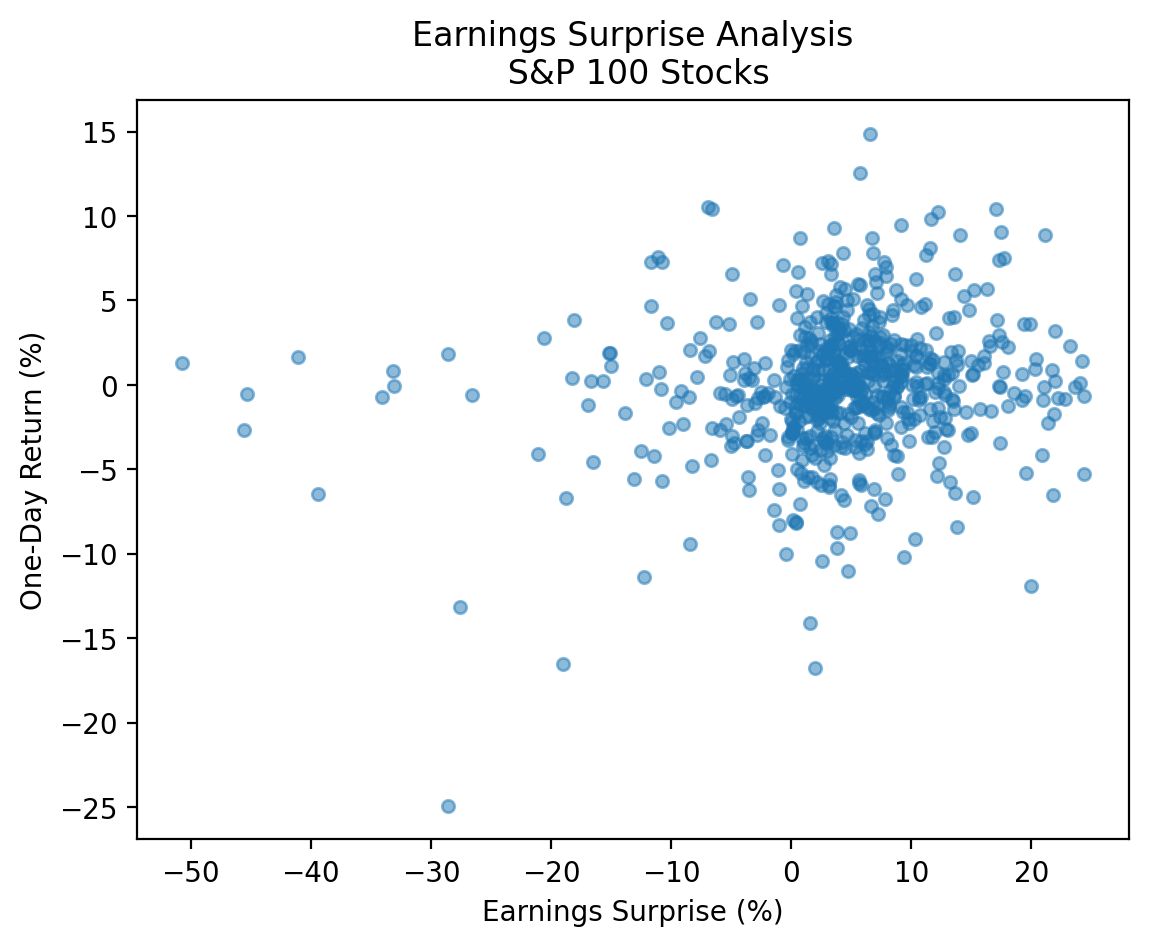

In [43]:
(
    surprises_2
    .loc[cond_2, ['Surprise(%)', 'Returns']]
    .mul(100)
    .plot(kind='scatter', x='Surprise(%)', y='Returns', alpha=0.5)
)

plt.xlabel('Earnings Surprise (%)')
plt.ylabel('One-Day Return (%)')
plt.title('Earnings Surprise Analysis\n S&P 100 Stocks')
plt.show()

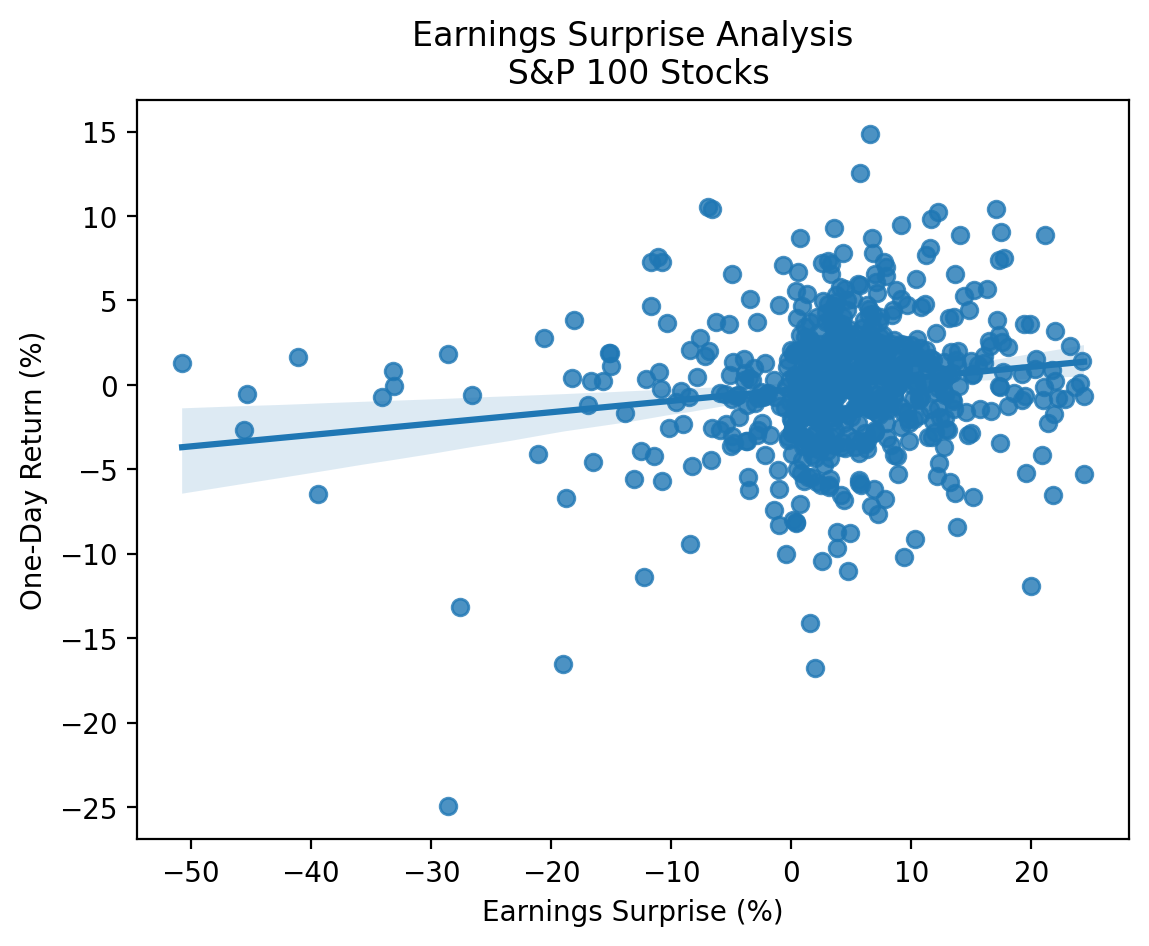

In [44]:
sns.regplot(
    data=surprises_2.loc[cond_2, ['Surprise(%)', 'Returns']].mul(100),
    x='Surprise(%)',
    y='Returns'
)

plt.xlabel('Earnings Surprise (%)')
plt.ylabel('One-Day Return (%)')
plt.title('Earnings Surprise Analysis\n S&P 100 Stocks')
plt.show()

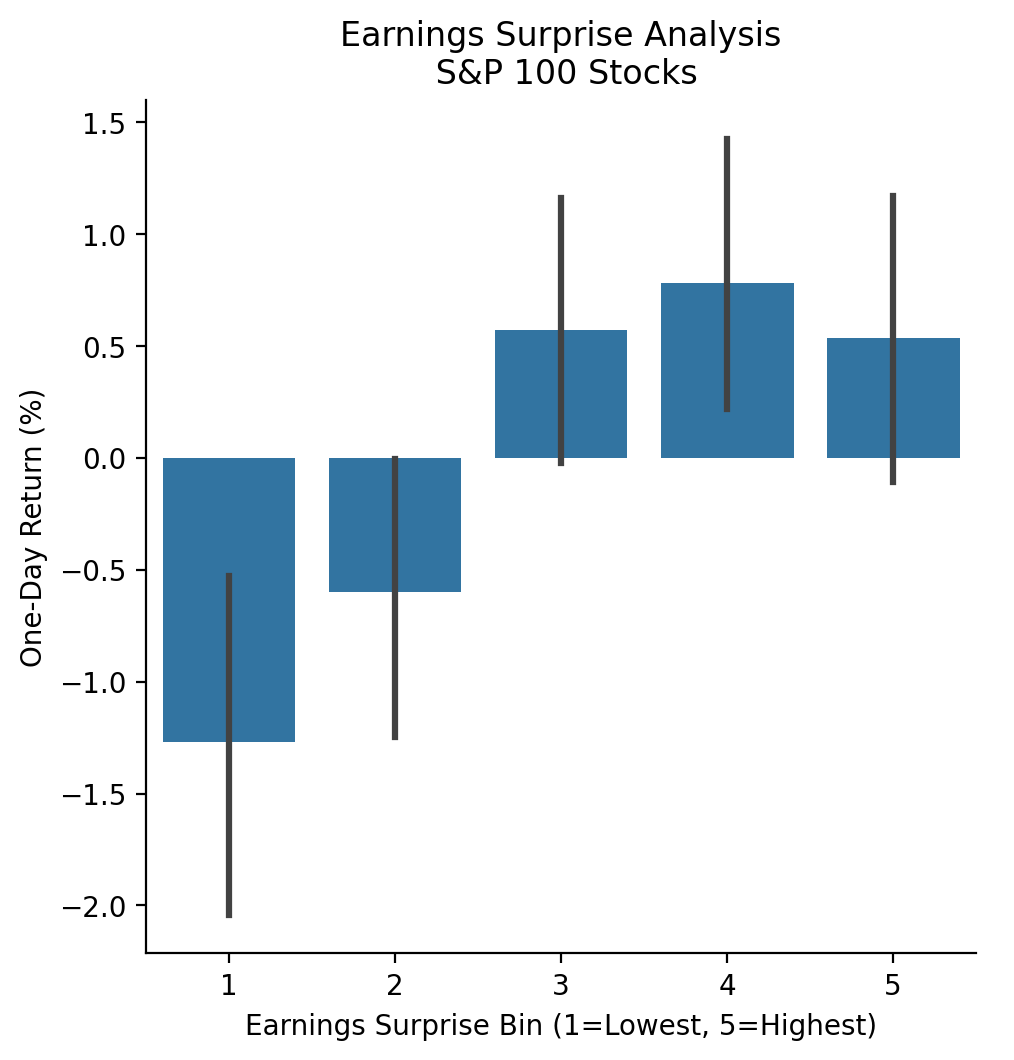

In [45]:
sns.catplot(
    data=(
        surprises_2
        .loc[cond_2, ['Surprise(%)', 'Returns']]
        .dropna()
        .mul(100)
        .assign(surprise_bin=lambda x: pd.qcut(x['Surprise(%)'], q=5, labels=False) + 1)
    ),
    x='surprise_bin',
    y='Returns',
    kind='bar'
)

plt.xlabel('Earnings Surprise Bin (1=Lowest, 5=Highest)')
plt.ylabel('One-Day Return (%)')
plt.title('Earnings Surprise Analysis\n S&P 100 Stocks')
plt.show()